# **IMPORT LIBRARIES**

In [1]:
from prophet import Prophet
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# **DOWNLOAD DATASET**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/schoolingfertilitydataset.csv")
df

,Unnamed: 0,Country,Year,fertility,Code,avg_years_of_schooling
0,0,Afghanistan,2007,6.56,AFG,2.9
1,1,Afghanistan,1995,7.61,AFG,1.9
2,2,Afghanistan,2008,6.37,AFG,3.0
3,3,Afghanistan,2017,4.63,AFG,3.8
4,4,Afghanistan,1994,7.57,AFG,1.8
...,...,...,...,...,...,...
5121,5121,Zimbabwe,2010,4.03,ZWE,7.3
5122,5122,Zimbabwe,2000,3.75,ZWE,6.5
5123,5123,Zimbabwe,2017,3.71,ZWE,8.2
5124,5124,Zimbabwe,2002,3.72,ZWE,6.9


In [3]:
#Drop column Unnamed
df = df.drop("Unnamed: 0", axis="columns")
df

,Country,Year,fertility,Code,avg_years_of_schooling
0,Afghanistan,2007,6.56,AFG,2.9
1,Afghanistan,1995,7.61,AFG,1.9
2,Afghanistan,2008,6.37,AFG,3.0
3,Afghanistan,2017,4.63,AFG,3.8
4,Afghanistan,1994,7.57,AFG,1.8
...,...,...,...,...,...
5121,Zimbabwe,2010,4.03,ZWE,7.3
5122,Zimbabwe,2000,3.75,ZWE,6.5
5123,Zimbabwe,2017,3.71,ZWE,8.2
5124,Zimbabwe,2002,3.72,ZWE,6.9


In [4]:
df.head()

,Country,Year,fertility,Code,avg_years_of_schooling
0,Afghanistan,2007,6.56,AFG,2.9
1,Afghanistan,1995,7.61,AFG,1.9
2,Afghanistan,2008,6.37,AFG,3.0
3,Afghanistan,2017,4.63,AFG,3.8
4,Afghanistan,1994,7.57,AFG,1.8


***AFEGHANISTAN***

In [5]:
#Select the dataset only of Afeghanistan
df_afg = df[df["Country"]=="Afghanistan"]

#Sort values by Year
df_afg = df_afg.sort_values("Year")

#Select only fertility rate by Afeghanistan
df_afg_fert = df_afg[["Year", "fertility"]].copy()

#Change the names of the columns to "ds" and "y" like the Facebook Prophet requires
df_afg_fert.columns = ['ds', 'y']
df_afg_fert['ds'] = pd.to_datetime(df_afg_fert['ds'], format="%Y")
df_afg_fert.shape, df_afg_fert.dtypes

((34, 2),
 ds    datetime64[ns]
 y            float64
 dtype: object)

In [6]:
#Initiate and fit the model
modelafg = Prophet()
modelafg.fit(df_afg_fert)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/40ur3g49.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/tp2_npst.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34066', 'data', 'file=/tmp/tmpj7_e0h9y/40ur3g49.json', 'init=/tmp/tmpj7_e0h9y/tp2_npst.json', 'output', 'file=/tmp/tmpj7_e0h9y/prophet_modelesyusfvu/prophet_model-20230613205342.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:53:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:53:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [7]:
#Make a crossvalidation
cv_resultsafg = cross_validation(modelafg, initial="9125 days", horizon='730 days', period='365 days')
cv_resultsafg

INFO:prophet:Making 28 forecasts with cutoffs between 1988-01-09 00:00:00 and 2015-01-02 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/1g031saj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/tc37c8gt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11586', 'data', 'file=/tmp/tmpj7_e0h9y/1g031saj.json', 'init=/tmp/tmpj7_e0h9y/tc37c8gt.json', 'output', 'file=/tmp/tmpj7_e0h9y/prophet_model32acvqep/prophet_model-20230613205343.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:53:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:53:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/zend5ht6.json
DEBUG:cmdstanpy:input tempfile

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1990-01-01,7.451790,7.447374,7.456387,7.47,1988-01-09
1,1990-01-01,7.451790,7.451790,7.451790,7.47,1989-01-08
2,1991-01-01,7.447933,7.447790,7.448024,7.48,1989-01-08
3,1991-01-01,7.472813,7.472813,7.472813,7.48,1990-01-08
4,1992-01-01,7.480860,7.480708,7.481171,7.50,1990-01-08
5,1992-01-01,7.509990,7.509990,7.509990,7.50,1991-01-08
6,1993-01-01,7.500059,7.498553,7.501046,7.54,1991-01-08
7,1993-01-01,7.497156,7.497156,7.497156,7.54,1992-01-08
8,1994-01-01,7.494304,7.493326,7.495048,7.57,1992-01-08
9,1994-01-01,7.567317,7.567137,7.567790,7.57,1993-01-07


In [8]:
#See the metrics (looking for MSE)
df_af = performance_metrics(cv_resultsafg, rolling_window=1.0)
df_af

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,730 days,0.007137,0.084481,0.069474,0.010457,0.009329,0.010391,0.018182


In [10]:
#Make a prediction for 4 years
horizonafg = 5
futureafg = modelafg.make_future_dataframe(periods=horizonafg, freq="Y")
forecastafg = modelafg.predict(futureafg)
forecastafg.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
34,2017-12-31,-2.435975,4.401672,4.426411,-2.439947,-2.431783,6.849832,6.849832,6.849832,6.849832,6.849832,6.849832,0.0,0.0,0.0,4.413858
35,2018-12-31,-2.631333,4.211398,4.248239,-2.646746,-2.616742,6.860459,6.860459,6.860459,6.860459,6.860459,6.860459,0.0,0.0,0.0,4.229126
36,2019-12-31,-2.826692,4.015562,4.078206,-2.855745,-2.799683,6.873368,6.873368,6.873368,6.873368,6.873368,6.873368,0.0,0.0,0.0,4.046676
37,2020-12-31,-3.022587,3.773791,3.868217,-3.068589,-2.978935,6.841885,6.841885,6.841885,6.841885,6.841885,6.841885,0.0,0.0,0.0,3.819298
38,2021-12-31,-3.217945,3.563767,3.696991,-3.286380,-3.153795,6.849832,6.849832,6.849832,6.849832,6.849832,6.849832,0.0,0.0,0.0,3.631887


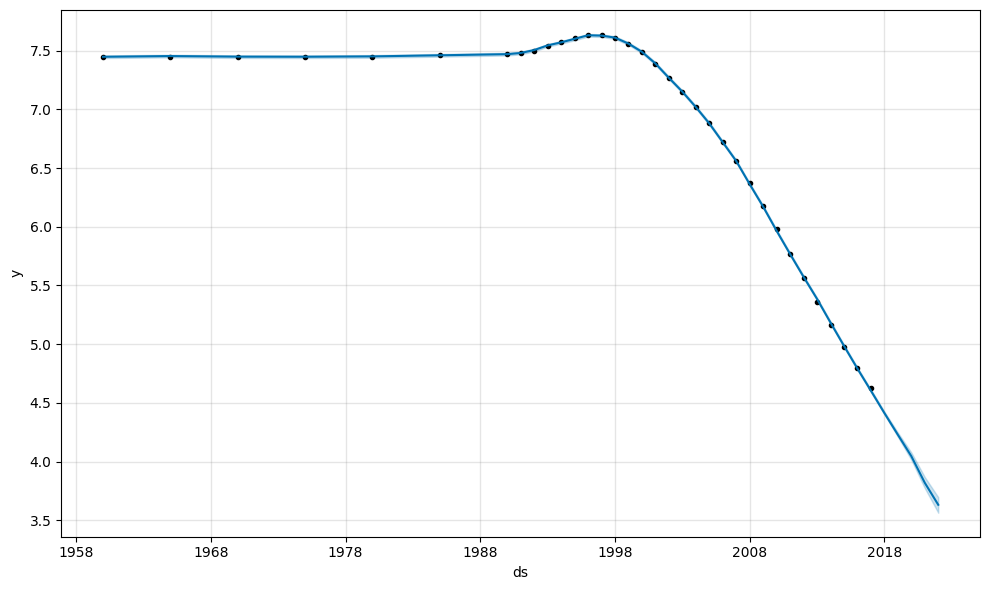

In [11]:
#Plot the results
modelafg.plot(forecastafg);

***BRAZIL***

In [12]:
#Select the dataset only of Brazil
df_br = df[df["Country"]=="Brazil"]

#Sort values by Year
df_br = df_br.sort_values("Year")

#Select only fertility rate by Brazil
df_br_fert = df_br[["Year", "fertility"]].copy()

#Change the names of the columns to "ds" and "y" like the Facebook Prophet requires
df_br_fert.columns = ['ds', 'y']
df_br_fert['ds'] = pd.to_datetime(df_br_fert['ds'], format="%Y")
df_afg_fert.shape, df_afg_fert.dtypes

((34, 2),
 ds    datetime64[ns]
 y            float64
 dtype: object)

In [13]:
#Initiate and fit the model
modelbr = Prophet()
modelbr.fit(df_br_fert)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/ywm3x37r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/4cqn2ew9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57723', 'data', 'file=/tmp/tmpj7_e0h9y/ywm3x37r.json', 'init=/tmp/tmpj7_e0h9y/4cqn2ew9.json', 'output', 'file=/tmp/tmpj7_e0h9y/prophet_modelbustl69a/prophet_model-20230613205627.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:56:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
#Make a crossvalidation
cv_resultsbr = cross_validation(modelbr, initial="9125 days", horizon='730 days', period='365 days')
cv_resultsbr

INFO:prophet:Making 28 forecasts with cutoffs between 1988-01-09 00:00:00 and 2015-01-02 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/zkpi_aoh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/f48fjz3d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37431', 'data', 'file=/tmp/tmpj7_e0h9y/zkpi_aoh.json', 'init=/tmp/tmpj7_e0h9y/f48fjz3d.json', 'output', 'file=/tmp/tmpj7_e0h9y/prophet_modell_dcu7ps/prophet_model-20230613205634.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:56:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/yvue7fgk.json
DEBUG:cmdstanpy:input tempfile

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1990-01-01,2.729263,2.691148,2.764216,2.90,1988-01-09
1,1990-01-01,2.729263,2.729263,2.729263,2.90,1989-01-08
2,1991-01-01,2.619138,2.616396,2.619147,2.82,1989-01-08
3,1991-01-01,2.748752,2.700704,2.798906,2.82,1990-01-08
4,1992-01-01,2.729779,2.681017,2.785147,2.75,1990-01-08
5,1992-01-01,2.751299,2.698576,2.811304,2.75,1991-01-08
6,1993-01-01,2.699049,2.642467,2.752156,2.69,1991-01-08
7,1993-01-01,2.709949,2.654938,2.757453,2.69,1992-01-08
8,1994-01-01,2.493474,2.443766,2.539585,2.64,1992-01-08
9,1994-01-01,2.486440,2.448672,2.524795,2.64,1993-01-07


In [15]:
#See the metrics (looking for MSE)
df_b = performance_metrics(cv_resultsbr, rolling_window=1.0)
df_b

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,730 days,0.007997,0.089427,0.071025,0.032755,0.025687,0.033516,0.454545


In [16]:
#Make a prediction for 4 years
horizonbr = 5
futurebr = modelbr.make_future_dataframe(periods=horizonbr, freq="Y")
forecastbr = modelbr.predict(futurebr)
forecastbr.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
34,2017-12-31,-3.087569,1.775925,1.848598,-3.089064,-3.085722,4.898658,4.898658,4.898658,4.898658,4.898658,4.898658,0.0,0.0,0.0,1.811089
35,2018-12-31,-3.099265,1.836488,1.914273,-3.104899,-3.092040,4.975801,4.975801,4.975801,4.975801,4.975801,4.975801,0.0,0.0,0.0,1.876536
36,2019-12-31,-3.110961,1.923853,2.002878,-3.121912,-3.097047,5.072363,5.072363,5.072363,5.072363,5.072363,5.072363,0.0,0.0,0.0,1.961402
37,2020-12-31,-3.122689,1.677709,1.760763,-3.140203,-3.100445,4.841160,4.841160,4.841160,4.841160,4.841160,4.841160,0.0,0.0,0.0,1.718471
38,2021-12-31,-3.134385,1.718582,1.810591,-3.160610,-3.102980,4.898658,4.898658,4.898658,4.898658,4.898658,4.898658,0.0,0.0,0.0,1.764273


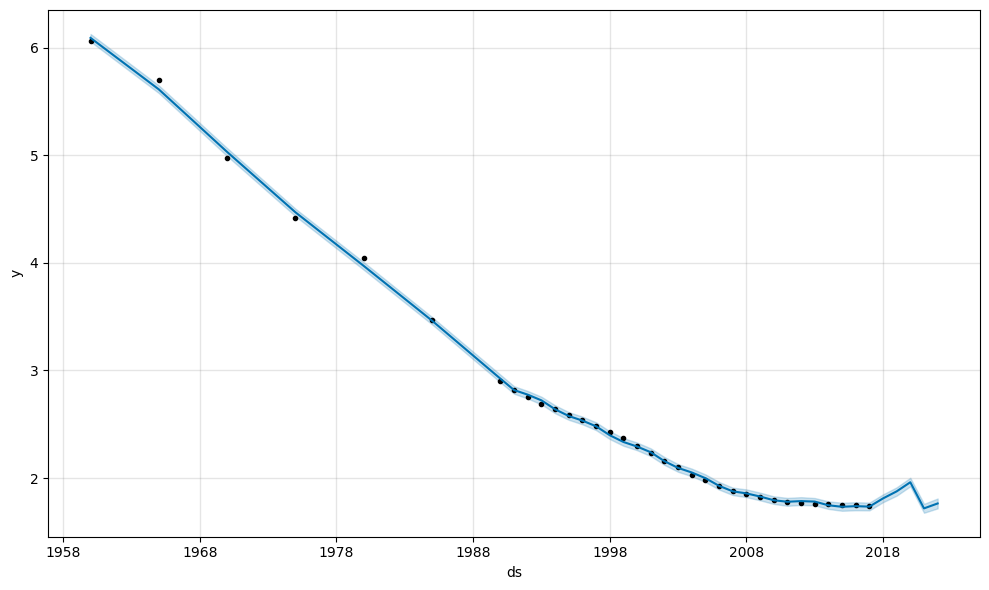

In [17]:
#Plot the results
modelbr.plot(forecastbr);

***JAPAN***

In [18]:
#Select the dataset only of Japan
df_jp = df[df["Country"]=="Japan"]

#Sort values by Year
df_jp = df_jp.sort_values("Year")

#Select only fertility rate by Japan
df_jp_fert = df_jp[["Year", "fertility"]].copy()

#Change the names of the columns to "ds" and "y" like the Facebook Prophet requires
df_jp_fert.columns = ['ds', 'y']
df_jp_fert['ds'] = pd.to_datetime(df_jp_fert['ds'], format="%Y")
df_jp_fert.shape, df_jp_fert.dtypes

((34, 2),
 ds    datetime64[ns]
 y            float64
 dtype: object)

In [19]:
#Initiate and fit the model
modeljpn = Prophet()
modeljpn.fit(df_jp_fert)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/m7qcw0re.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/bos8z9cn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11484', 'data', 'file=/tmp/tmpj7_e0h9y/m7qcw0re.json', 'init=/tmp/tmpj7_e0h9y/bos8z9cn.json', 'output', 'file=/tmp/tmpj7_e0h9y/prophet_modelgl01bime/prophet_model-20230613205704.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:57:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:57:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
#Make a crossvalidation
cv_resultsjpn = cross_validation(modeljpn, initial="9125 days", horizon='730 days', period='365 days')
cv_resultsjpn

INFO:prophet:Making 28 forecasts with cutoffs between 1988-01-09 00:00:00 and 2015-01-02 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/78fkwivd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/mxvewz6m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12422', 'data', 'file=/tmp/tmpj7_e0h9y/78fkwivd.json', 'init=/tmp/tmpj7_e0h9y/mxvewz6m.json', 'output', 'file=/tmp/tmpj7_e0h9y/prophet_modellghmhc58/prophet_model-20230613205711.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:57:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:57:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/dvjcv7p5.json
DEBUG:cmdstanpy:input tempfile

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1990-01-01,1.602730,1.571033,1.633503,1.54,1988-01-09
1,1990-01-01,1.602730,1.580566,1.622313,1.54,1989-01-08
2,1991-01-01,1.527468,1.507171,1.549952,1.53,1989-01-08
3,1991-01-01,1.551246,1.454490,1.634669,1.53,1990-01-08
4,1992-01-01,1.450852,1.354532,1.538525,1.50,1990-01-08
5,1992-01-01,1.440219,1.354565,1.522331,1.50,1991-01-08
6,1993-01-01,1.596692,1.505649,1.674534,1.46,1991-01-08
7,1993-01-01,1.606804,1.518577,1.688358,1.46,1992-01-08
8,1994-01-01,1.551131,1.471445,1.629749,1.50,1992-01-08
9,1994-01-01,1.517650,1.430091,1.612267,1.50,1993-01-07


In [21]:
#See the metrics (looking for MSE)
df_j = performance_metrics(cv_resultsjpn, rolling_window=1.0)
df_j

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,730 days,0.009731,0.098647,0.079832,0.05717,0.050416,0.059221,0.509091


In [22]:
#Make a prediction for 4 years
horizonjpn = 5
futurejpn = modeljpn.make_future_dataframe(periods=horizonjpn, freq="Y")
forecastjpn = modeljpn.predict(futurejpn)
forecastjpn.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
34,2017-12-31,-1.028781,1.313563,1.413686,-1.029508,-1.028076,2.392018,2.392018,2.392018,2.392018,2.392018,2.392018,0.0,0.0,0.0,1.363236
35,2018-12-31,-1.019132,1.269620,1.375003,-1.021559,-1.016751,2.342430,2.342430,2.342430,2.342430,2.342430,2.342430,0.0,0.0,0.0,1.323298
36,2019-12-31,-1.009482,1.221052,1.324373,-1.014634,-1.004765,2.282977,2.282977,2.282977,2.282977,2.282977,2.282977,0.0,0.0,0.0,1.273494
37,2020-12-31,-0.999806,1.381558,1.482392,-1.008002,-0.992569,2.431649,2.431649,2.431649,2.431649,2.431649,2.431649,0.0,0.0,0.0,1.431843
38,2021-12-31,-0.990157,1.350980,1.454782,-1.001639,-0.980042,2.392018,2.392018,2.392018,2.392018,2.392018,2.392018,0.0,0.0,0.0,1.401861


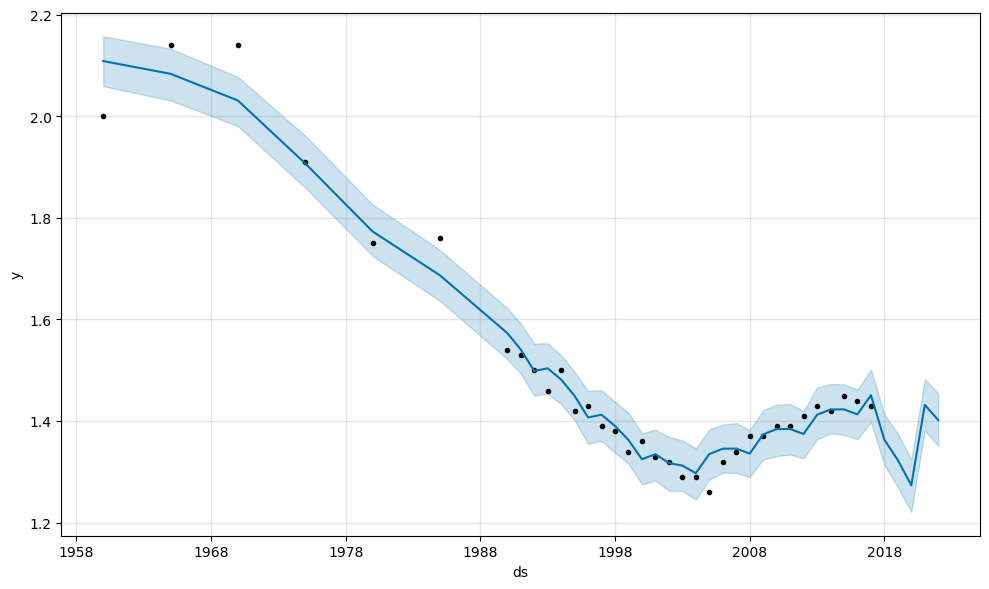

In [23]:
#Plot the results
modeljpn.plot(forecastjpn);

***YEMEN***

In [24]:
#Select the dataset only of Yemen
df_yem = df[df["Country"]=="Yemen"]

#Sort values by Year
df_yem = df_yem.sort_values("Year")

#Select only fertility rate by Yemen
df_yem_fert = df_yem[["Year", "fertility"]].copy()

#Change the names of the columns to "ds" and "y" like the Facebook Prophet requires
df_yem_fert.columns = ['ds', 'y']
df_yem_fert['ds'] = pd.to_datetime(df_yem_fert['ds'], format="%Y")
df_yem_fert.shape, df_yem_fert.dtypes

((34, 2),
 ds    datetime64[ns]
 y            float64
 dtype: object)

In [25]:
#Initiate and fit the model
modelyem = Prophet()
modelyem.fit(df_yem_fert)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/ysfcsof_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/bqpj0z_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81190', 'data', 'file=/tmp/tmpj7_e0h9y/ysfcsof_.json', 'init=/tmp/tmpj7_e0h9y/bqpj0z_e.json', 'output', 'file=/tmp/tmpj7_e0h9y/prophet_modeldu5cvncm/prophet_model-20230613205746.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:57:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:57:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [26]:
#Make a crossvalidation
cv_resultsyem = cross_validation(modelyem, initial="9125 days", horizon='730 days', period='365 days')
cv_resultsyem

INFO:prophet:Making 28 forecasts with cutoffs between 1988-01-09 00:00:00 and 2015-01-02 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/mg3stw4m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/jov6y6t1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=625', 'data', 'file=/tmp/tmpj7_e0h9y/mg3stw4m.json', 'init=/tmp/tmpj7_e0h9y/jov6y6t1.json', 'output', 'file=/tmp/tmpj7_e0h9y/prophet_modelv4bb6w34/prophet_model-20230613205753.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:57:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:57:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7_e0h9y/oimpfmfu.json
DEBUG:cmdstanpy:input tempfile: 

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1990-01-01,9.174458,9.140473,9.202387,8.61,1988-01-09
1,1990-01-01,9.174458,9.174458,9.174458,8.61,1989-01-08
2,1991-01-01,9.239215,9.237823,9.239215,8.46,1989-01-08
3,1991-01-01,8.656290,8.578963,8.727434,8.46,1990-01-08
4,1992-01-01,8.698127,8.617560,8.768705,8.27,1990-01-08
5,1992-01-01,8.258645,8.258645,8.258645,8.27,1991-01-08
6,1993-01-01,8.553428,8.541421,8.579787,8.05,1991-01-08
7,1993-01-01,8.502184,8.502184,8.502184,8.05,1992-01-08
8,1994-01-01,8.392999,8.373209,8.411454,7.80,1992-01-08
9,1994-01-01,7.941849,7.941393,7.944969,7.80,1993-01-07


In [27]:
#See the metrics (looking for MSE)
df_y = performance_metrics(cv_resultsyem, rolling_window=1.0)
df_y

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,730 days,1.015873,1.007905,0.9158,0.163277,0.201563,0.148284,0.163636


In [31]:
#Make a prediction for 4 years
horizonyem = 5
futureyem = modelyem.make_future_dataframe(periods=horizonyem, freq="Y")
forecastyem = modelyem.predict(futureyem)
forecastyem.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
34,2017-12-31,-3.651418,3.761885,3.780493,-3.661498,-3.643406,7.423307,7.423307,7.423307,7.423307,7.423307,7.423307,0.0,0.0,0.0,3.771889
35,2018-12-31,-3.763472,3.632098,3.697359,-3.795706,-3.731188,7.428520,7.428520,7.428520,7.428520,7.428520,7.428520,0.0,0.0,0.0,3.665048
36,2019-12-31,-3.875525,3.497189,3.626021,-3.940430,-3.810608,7.435590,7.435590,7.435590,7.435590,7.435590,7.435590,0.0,0.0,0.0,3.560065
37,2020-12-31,-3.987886,3.331629,3.541123,-4.088677,-3.880251,7.419884,7.419884,7.419884,7.419884,7.419884,7.419884,0.0,0.0,0.0,3.431998
38,2021-12-31,-4.099939,3.174654,3.481907,-4.248059,-3.941834,7.423307,7.423307,7.423307,7.423307,7.423307,7.423307,0.0,0.0,0.0,3.323368


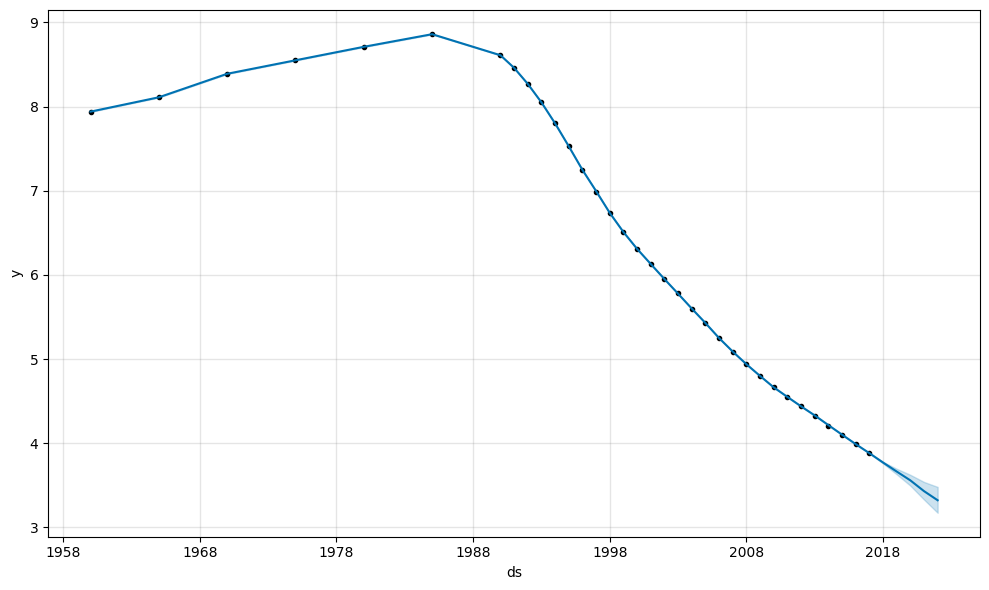

In [32]:
#Plot the results
modelyem.plot(forecastyem);